In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(data.sex.drop_duplicates())
data.sex=le.transform(data.sex)
le.fit(data.smoker.drop_duplicates())
data.smoker=le.transform(data.smoker)
le.fit(data.region.drop_duplicates())
data.region=le.transform(data.region)

In [6]:
data.corr()["charges"].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

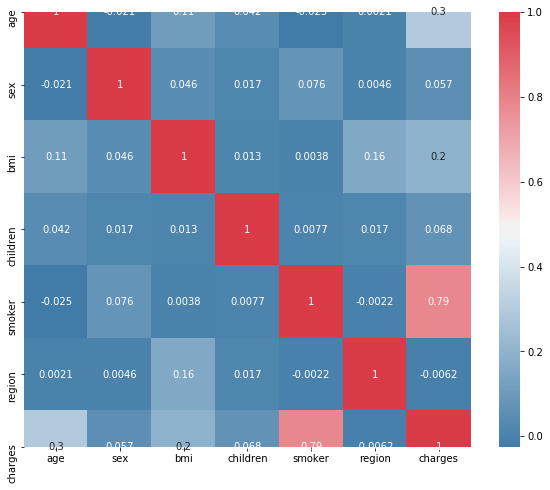

In [8]:
f,ax=plt.subplots(figsize=(10,8))
corr=data.corr()
sns.heatmap(corr,ax=ax,annot=True,cmap=sns.diverging_palette(240,10,as_cmap=True))

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

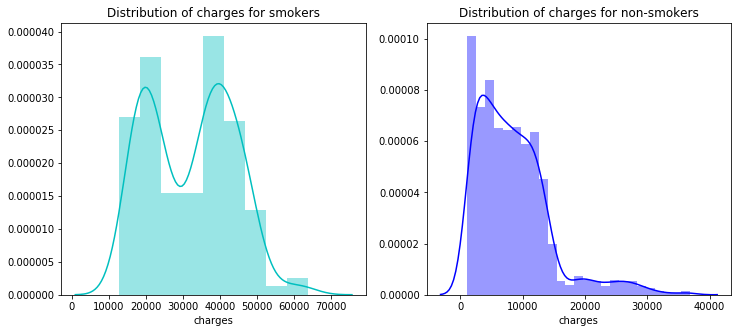

In [11]:
f=plt.figure(figsize=(12,5))
ax=f.add_subplot(121)
sns.distplot(data[(data.smoker==1)]["charges"],color="c",ax=ax)
ax.set_title("Distribution of charges for smokers")

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker==0)]["charges"],color="b",ax=ax)
ax.set_title("Distribution of charges for non-smokers")

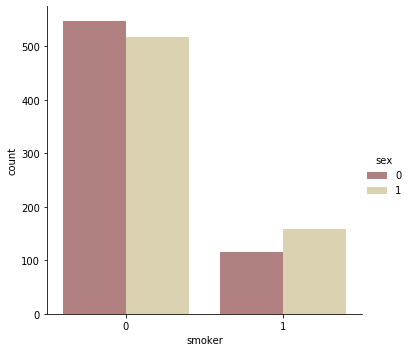

In [12]:
sns.catplot(x="smoker",kind="count",hue="sex",palette="pink",data=data)

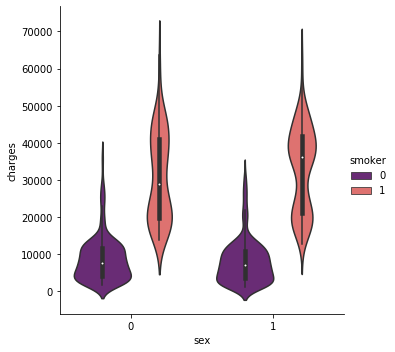

In [13]:
sns.catplot(x="sex",y="charges",hue="smoker",kind="violin",data=data,palette="magma")

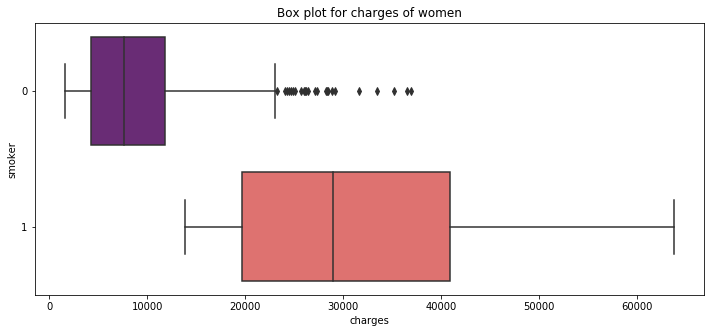

In [15]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(x="charges",y="smoker",data=data[(data.sex==0)],orient="h",palette="magma")

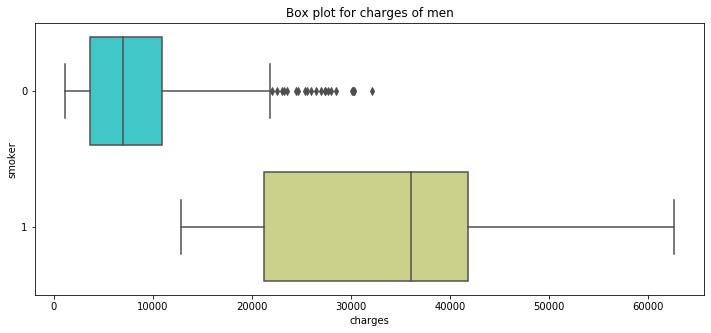

In [17]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(x="charges",y="smoker",data=data[(data.sex==1)],orient="h",palette="rainbow")

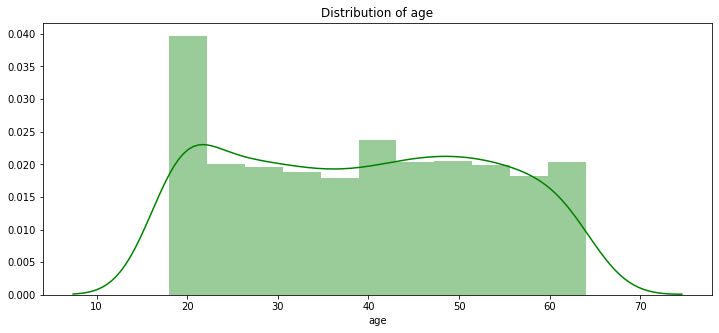

In [18]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
sns.distplot(data["age"],color="g")

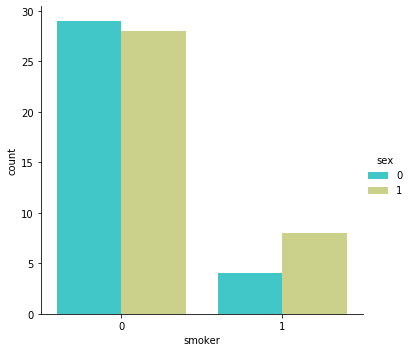

In [19]:
sns.catplot(x="smoker",kind="count",hue="sex",data=data[(data.age==18)],palette="rainbow")

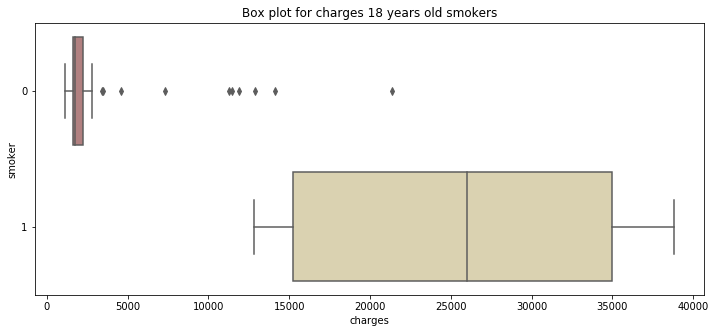

In [20]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges 18 years old smokers")
sns.boxplot(x="charges",y="smoker",data=data[(data.age==18)],palette="pink",orient="h")

Text(0.5, 1, 'Distribution of charges and age for non-smokers')

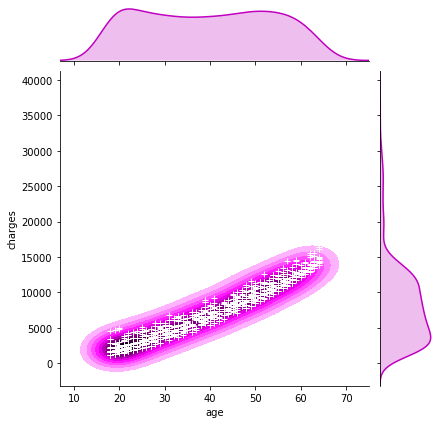

In [22]:
g=sns.jointplot(x="age",y="charges",data=data[(data.smoker==0)],kind="kde",color="m")
g.plot_joint(plt.scatter,c="w",s=30,linewidth=1,marker="+")
g.ax_joint.collections[0].set_alpha(0)
ax.set_title("Distribution of charges and age for non-smokers")

Text(0.5, 1, 'Distribution of charges and age for smokers')

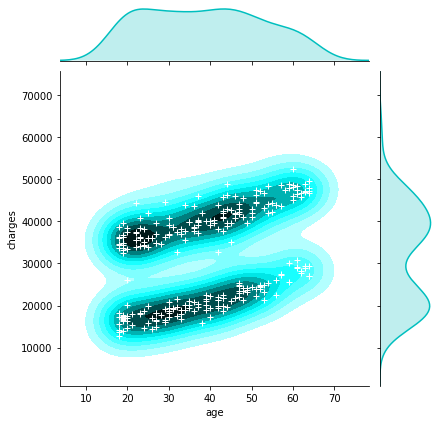

In [23]:
g=sns.jointplot(x="age",y="charges",data=data[(data.smoker==1)],kind="kde",color="c")
g.plot_joint(plt.scatter,c="w",s=30,linewidth=1,marker="+")
g.ax_joint.collections[0].set_alpha(0)
ax.set_title("Distribution of charges and age for smokers")

In [25]:
p=figure(plot_width=500,plot_height=450)
p.circle(x=data[(data.smoker==0)].age,y=data[(data.smoker==0)].charges,size=7,line_color="navy",fill_color="pink",fill_alpha=0.9)
show(p)

In [26]:
p=figure(plot_width=500,plot_height=450)
p.circle(x=data[(data.smoker==1)].age,y=data[(data.smoker==1)].charges,size=7,line_color="navy",fill_color="red",fill_alpha=0.9)
show(p)

C:\anaconda\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Smokers and non-smokers')

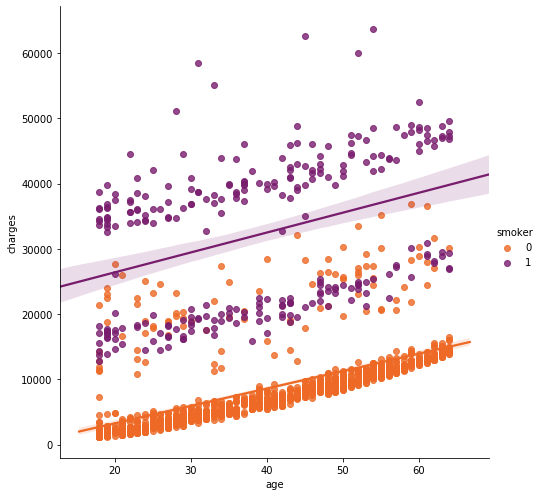

In [27]:
sns.lmplot(x="age",y="charges",hue="smoker",data=data,palette="inferno_r",size=7)
ax.set_title("Smokers and non-smokers")

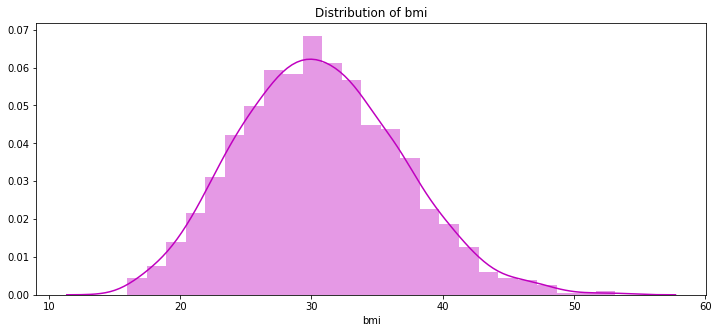

In [28]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
sns.distplot(data["bmi"],color="m")

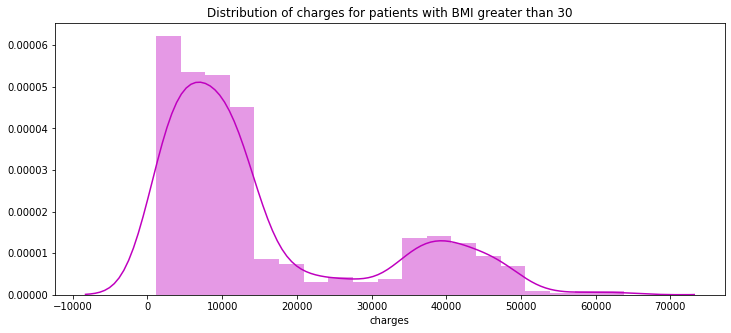

In [29]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
sns.distplot(data[(data.bmi>=30)]["charges"],color="m")

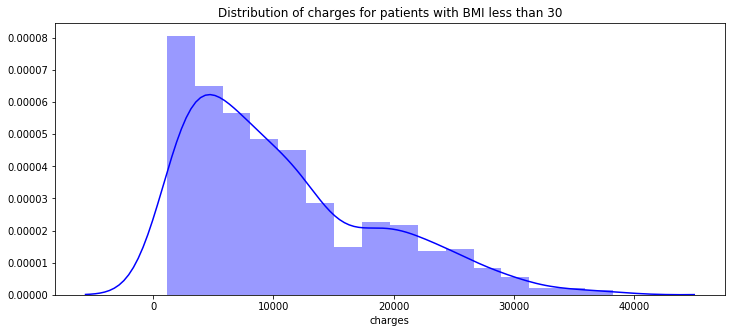

In [30]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
sns.distplot(data[(data.bmi<30)]["charges"],color="b")

Text(0.5, 1, 'Distribution of bmi and charges')

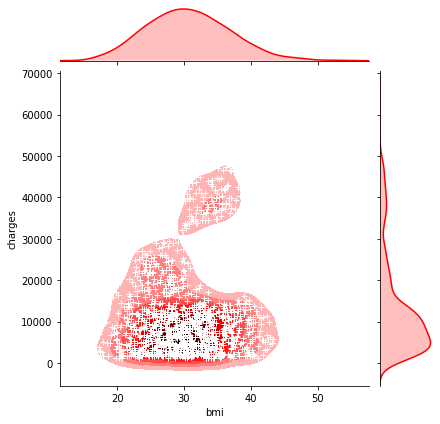

In [31]:
g=sns.jointplot(x="bmi",y="charges",data=data,kind="kde",color="r")
g.plot_joint(plt.scatter,c="w",s=30,linewidth=1,marker="+")
g.ax_joint.collections[0].set_alpha(0)
ax.set_title("Distribution of bmi and charges")

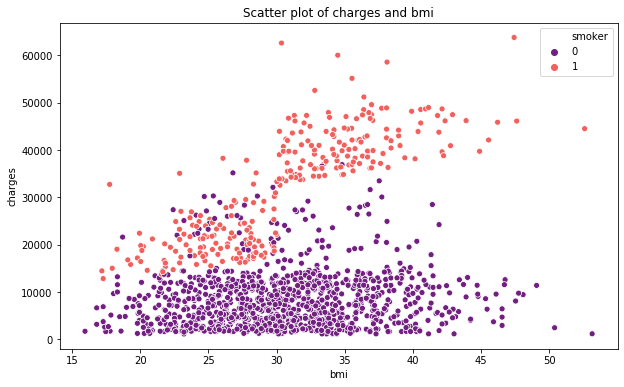

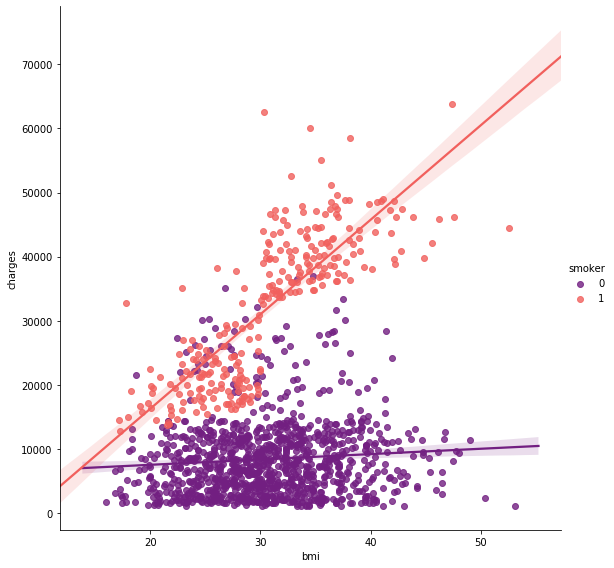

In [33]:
plt.figure(figsize=(10,6))
ax=sns.scatterplot(x="bmi",y="charges",data=data,palette="magma",hue="smoker")
ax.set_title("Scatter plot of charges and bmi")
sns.lmplot(x="bmi",y="charges",hue="smoker",data=data,palette="magma",size=8)

C:\anaconda\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


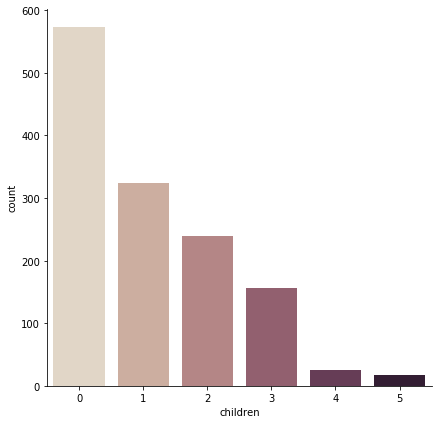

In [34]:
sns.catplot(x="children",kind="count",data=data,palette="ch:.25",size=6)

AttributeError: 'FacetGrid' object has no attribute 'set_title'

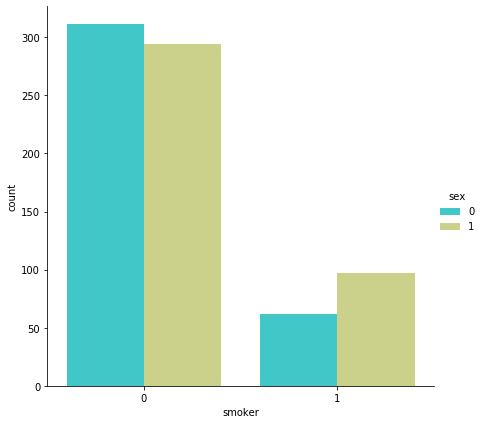

In [38]:
sns.catplot(x="smoker",kind="count",hue="sex",data=data[(data.children>0)],palette="rainbow",size=6)
ax.set_title("Smokers and non-smokers who have childrens")

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [41]:
x=data.drop(["charges"],axis=1)
y=data.charges

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
lr=LinearRegression().fit(x_train,y_train)

y_train_pred=lr.predict(x_train)
y_test_pred=lr.predict(x_test)

print(lr.score(x_test,y_test))

0.7962732059725786


In [42]:
X=data.drop(["charges"],axis=1)
Y=data.charges

quad=PolynomialFeatures(degree=2)
x_quad=quad.fit_transform(X)

X_train,X_test,Y_train,Y_test=train_test_split(x_quad,Y,random_state=0)

plr=LinearRegression().fit(X_train,Y_train)

Y_train_pred=plr.predict(X_train)
Y_test_pred=plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.8846283666147681


In [43]:
forest=RandomForestRegressor(n_estimators=100,criterion="mse",random_state=1,n_jobs=-1)
forest.fit(x_train,y_train)
forest_train_pred=forest.predict(x_train)
forest_test_pred=forest.predict(x_test)

print("MSE train data:%.3f,MSE test data:%.3f"%(
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print("R2 train data:%.3f,R2 test data:%.3f"%(
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data:3729086.094,MSE test data:19933823.142
R2 train data:0.974,R2 test data:0.873


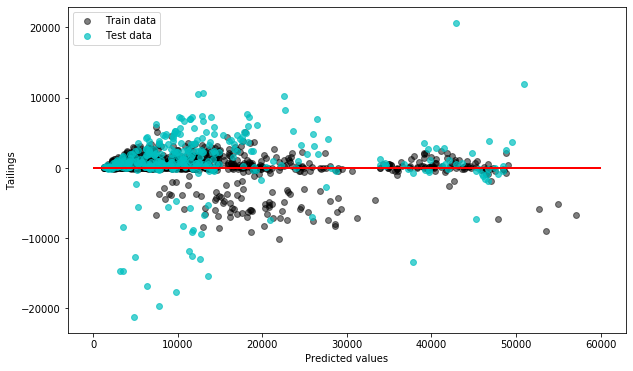

In [45]:
plt.figure(figsize=(10,6))
plt.scatter(forest_train_pred,forest_train_pred-y_train,c="black",marker="o",s=35,alpha=0.5,label="Train data")
plt.scatter(forest_test_pred,forest_test_pred-y_test,c="c",marker="o",s=35,alpha=0.7,label="Test data")
plt.xlabel("Predicted values")
plt.ylabel("Tailings")
plt.legend(loc="upper left")
plt.hlines(y=0,xmin=0,xmax=60000,lw=2,color="red")
plt.show()